# Analysis of Hotel Reservation Dataset

# Table of Contents

1	Introduction

***Questions

***Load the data and view the first 5 rows

***Get the idea of the size of the dataset

***Check the Dataset Information

2	Data Cleaning and Descriptive Statistics

3	Distribution of the Datasets - 

3.0	Analysis of Booking Status (Count Plot)

3.1	Scatter Plot.

3.2	Violin Plot.

4.3	Booking Status with Highest Avg Price Per Room.

3.4	No of Adults with Highest no of weekend nights.

3.5	No of Adults with Highest no of week nights.

3.6	Room Type Reserved by No of Adults.

3.7	Room Type Reserved by No of children.

4	Checking the Skewness of the variables

5	Analysis of the Data¶

6	Correlation Analysis using Pearson Correlation Coeficient

7	Statistics-Based Data Analysis
	
7.1	Model Building - 

7.2	Logistic Regression (LR)

8	Discussion of Findings

9	Conclusions

# Questions

1 What is the current booking status with the highest average price per room?
 
2 What is the highest number of adults with the most weekend nights?
 
3 What are the room types reserved for adults?
 
4 What is the relationship between the variables?
 
5 What is your advice to the hotel managers?

 # 1. Introduction

This notebook focus on the variables in the Hotel Reservation Dataset. investigate whether those variables have similar characteristics or features, using other variables in the data. The variables include 'Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests', and 'booking_status'].

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import inv
from scipy import  stats
import pylab as pl
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import math
import plotly.express as px
from scipy.stats import lognorm
import plotly
#%matplotlib widget
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from kmodes.kmodes import KModes
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import statsmodels.api as sm
import math
import warnings
warnings.filterwarnings('ignore')

# ***Load the data and view the first 5 rows

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\KaggleData\Hotel Reservations.csv')

In [3]:
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

# ***Get the idea of the size of the dataset

In [4]:
df.shape

(36275, 19)

The dataset shows that 36275 rows and 19 columns exist. From the dataset, few rows are not significant (NA) and will not add any insight to the analysis so they will be dropped to enable us to have a clean dataset

# ***Check the Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Five of the variables are categorical (labelled as 'object'), one is float, while the remaining variables are numerical (labelled as 'int'). 

# 2 - ***Data Cleaning and Exploratory Data Alalysis

Checking the information and na in the data using heatmap

In [6]:
#The information above shows the summary of the data before cleaning 
df.isnull()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False                       False   
1                  False              False                       False   
2                  False              False                       False   
3                  False              False                       False   
4                  False              False                       False   
...                  ...                ...                         ...   
36270              False              False                       False   
36271              False              False                       False   
36272              False              False                       False   
36273              False              False                       False   
36274              False              False                       False   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                   False      False         False          False   
1                   False      False         False          False   
2                   False      False         False          False   
3                   False      False         False          False   
4                   False      False         False          False   
...                   ...        ...           ...            ...   
36270               False      False         False          False   
36271               False      False         False          False   
36272               False      False         False          False   
36273               False      False         False          False   
36274               False      False         False          False   

       arrival_date  market_segment_type  repeated_guest  \
0             False                False           False   
1             False                False           False   
2             False                False           False   
3             False                False           False   
4             False                False           False   
...             ...                  ...             ...   
36270         False                False           False   
36271         False                False           False   
36272         False                False           False   
36273         False                False           False   
36274         False                False           False   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
36270                         False                                 False   
36271                         False                            

<AxesSubplot:>

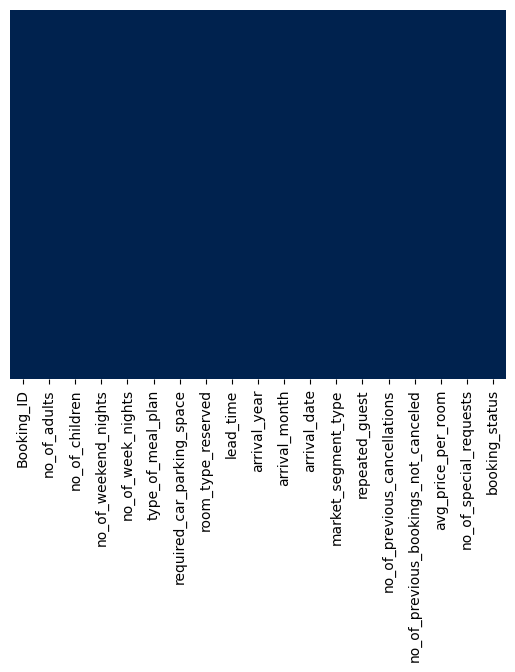

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

The data contain 36275 rows and 19 columns. Also, the above heatmap results show that there is no missing information, so there is no need to fill in any data. We can proceed to explore the dataset.

In [9]:
df = df.dropna()
df.duplicated().sum()

0

# ***Descriptive Statistics

In [11]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

The descriptive statistic of the data shows the mean and standard deviation of the data.

# 3. Distribution of the Datasets

# 3.0. Analysis of Booking Status

<AxesSubplot:xlabel='booking_status', ylabel='count'>

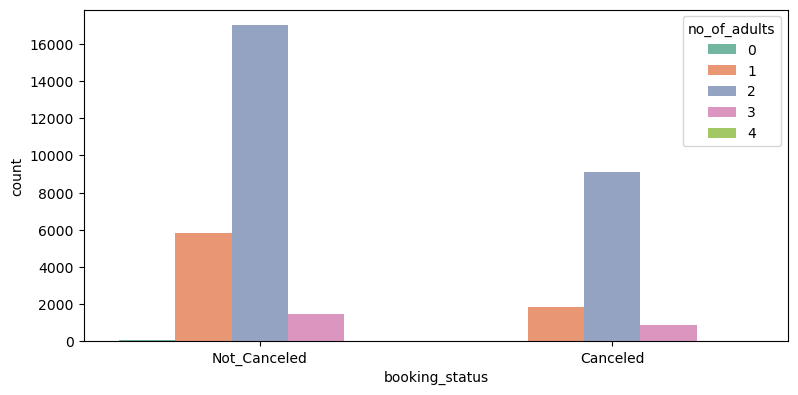

In [12]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

The analysis of the booking status in the above report shows that the highest number of adult cancelled and not cancelled bookings are two, followed by one.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

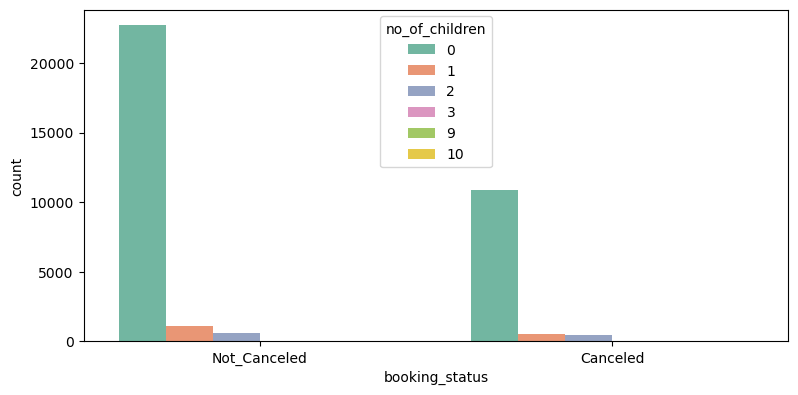

In [13]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

The analysis of the booking status in the above report shows that the highest number of children with cancelled or not cancelled bookings is 0, which means children are likely not to have cancelled or not cancelled bookings.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

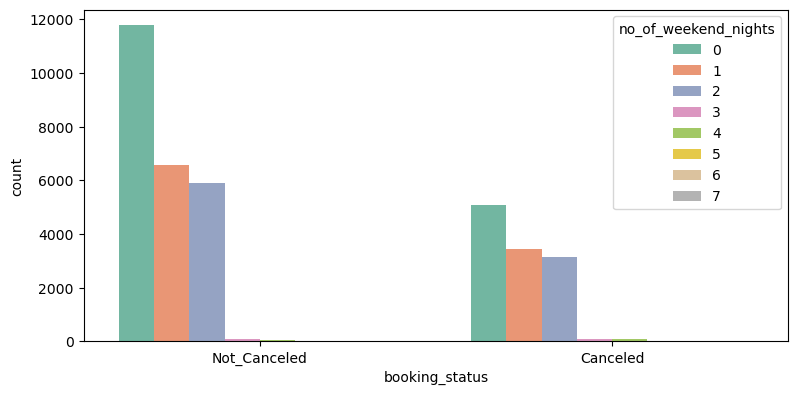

In [14]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

The analysis of the booking status in the above report shows that the highest number of weekend nights that a booking is cancelled or not cancelled is 0, followed by one and two, respectively. This indicates that the majority of time bookings are likely to be cancelled or not cancelled.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

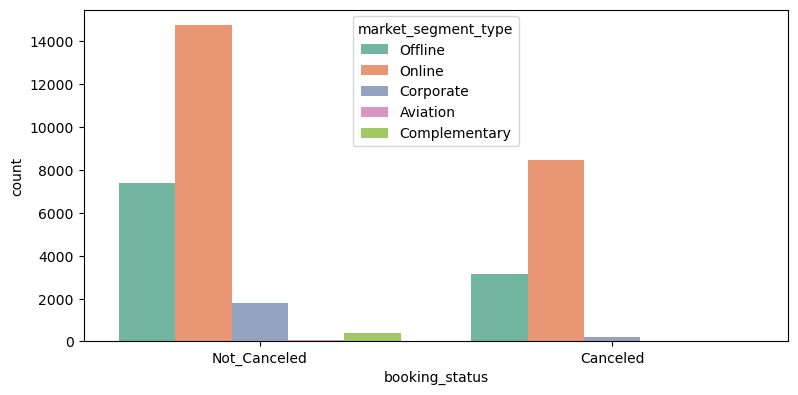

In [15]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

According to the above report's analysis of booking status, the online segment has the highest number of market segment type bookings cancelled and not cancelled by clients, followed by the offline segment, corporate segment, and complementary segment.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

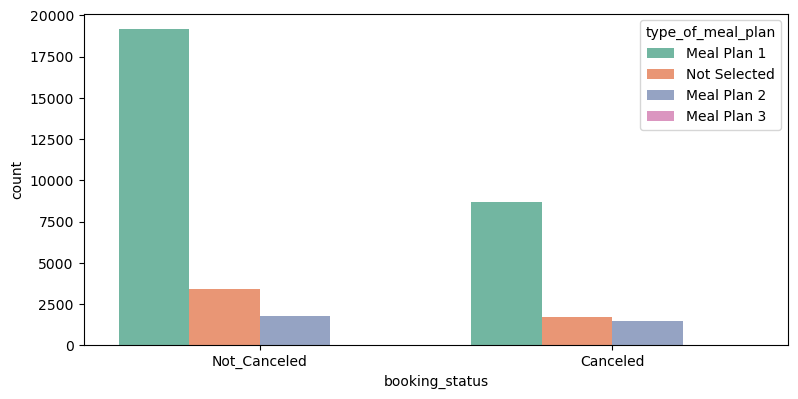

In [16]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

The analysis of the booking status of the above report shows that the highest type of meal plan cancelled or not cancelled by the client is Meal Plan 1, followed by Not Select and Meal Plan 2, respectively.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

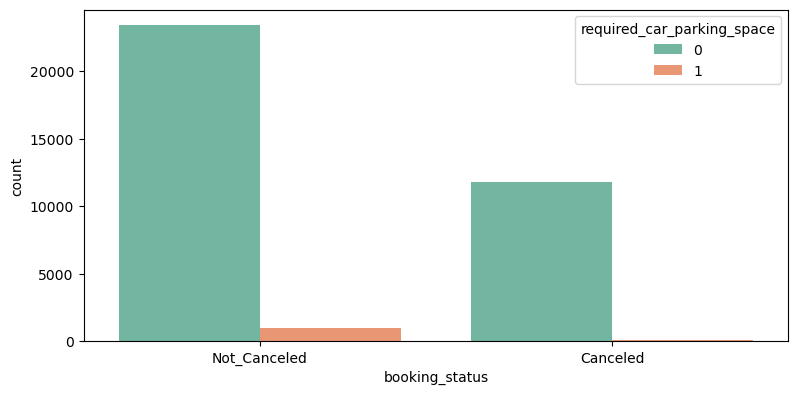

In [17]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

According to the above report's booking status analysis, the highest required car parking space cancelled and not cancelled by client is 0, while 1 are not likely to be cancelled. 

<AxesSubplot:xlabel='booking_status', ylabel='count'>

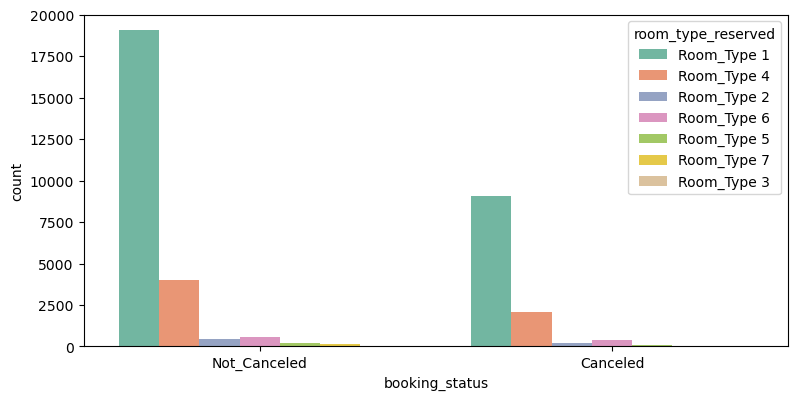

In [18]:
plt.figure(figsize = (20, 25))
plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

According to the plot above, the bookings with the highest number of cancelled and not cancelled are of room type 1. 

# 3.1. Scatter Plot

In [20]:
fig = px.scatter(data_frame=df, x="lead_time", y="avg_price_per_room", color = 'arrival_month')
fig.show()

In [21]:
fig = px.scatter(data_frame=df, x="lead_time", y="avg_price_per_room", color = 'booking_status')
fig.show()

# 3.2. Violin Plot

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

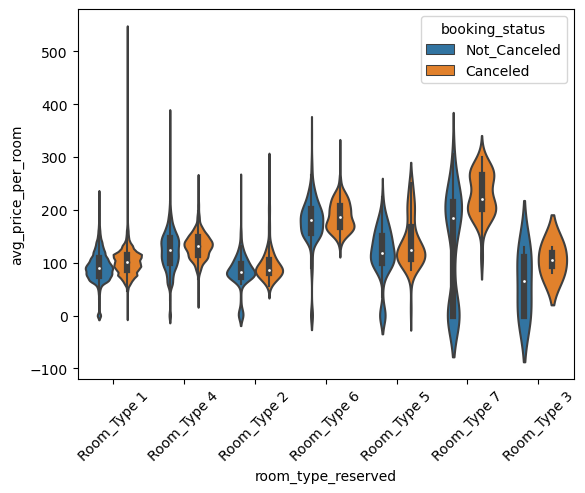

In [22]:
sns.violinplot(data=df, x="room_type_reserved", y="avg_price_per_room", hue="booking_status")
plt.xticks(rotation=45)

# 3.3. Booking Status with Highest Avg Price Per Room 

In [23]:
df.booking = df[['booking_status','avg_price_per_room']]
df.booking.columns = ['Booking Status', 'Avg Price']
df.booking
df.booking.sort_values("Avg Price", ascending=False)

Booking Status  Avg Price
33114       Canceled     540.00
9461    Not_Canceled     375.50
20900       Canceled     365.00
34306   Not_Canceled     349.63
14773   Not_Canceled     332.57
...              ...        ...
10477   Not_Canceled       0.00
1593    Not_Canceled       0.00
23612   Not_Canceled       0.00
20880   Not_Canceled       0.00
34671   Not_Canceled       0.00

[36275 rows x 2 columns]

Based on the above analysis, the booking status with the average price is cancelled. To further explore this factor, the frequency is 3314 times.

# 3.4. No of Adults with Highest no of weekend nights

In [24]:
df.week = df[['no_of_adults','no_of_weekend_nights']]
df.week.columns = ['No of Adults', 'Weekend Nights']
df.week
df.week.sort_values("Weekend Nights", ascending=False)

No of Adults  Weekend Nights
19512             2               7
18610             1               6
35199             1               6
2296              1               6
17938             1               6
...             ...             ...
23052             2               0
23050             1               0
23049             1               0
23048             2               0
18137             2               0

[36275 rows x 2 columns]

Based on the above analysis, the highest number of adults booking weekend nights is 2. This means two adilities always book at night by the weekend. To further explore this factor, the frequency is 19512 times.

# 3.5. No of Adults with Highest no of week nights

In [25]:
df.week = df[['no_of_adults', 'no_of_week_nights']]
df.week.columns = ['No of Adults', 'Week Nights']
df.week
df.week.sort_values("Week Nights", ascending=False)

No of Adults  Week Nights
33019             1           17
19512             2           17
16977             1           17
19745             1           16
34092             2           16
...             ...          ...
27856             2            0
25181             2            0
30924             1            0
5504              2            0
14967             1            0

[36275 rows x 2 columns]

Based on the above analysis, the highest number of adults booking weekend nights is 1. This means I always book at night during the week. To further explore this factor, the frequency is 33019 times.

# 3.6. Room Type Reserved by No of Adults

In [26]:
df.room = df[['room_type_reserved','no_of_adults']]
df.room.columns = ['Type of Room', 'No of Adults']
df.room
df.room.sort_values("No of Adults", ascending=False)

Type of Room  No of Adults
15220  Room_Type 5             4
24526  Room_Type 7             4
14046  Room_Type 7             4
17359  Room_Type 7             4
657    Room_Type 7             4
...            ...           ...
3250   Room_Type 6             0
29944  Room_Type 2             0
21432  Room_Type 2             0
25454  Room_Type 2             0
29507  Room_Type 2             0

[36275 rows x 2 columns]

Based on the above analysis, the highest number of adults reserved rooms. This shows that four adults always reserved rooms 5 and 7, respectively. This shows that adults always reserve rooms 5 and 7 most of the time.

# 3.7. Room Type Reserved by No of children

In [27]:
df.roomc = df[['room_type_reserved','no_of_children']]
df.roomc.columns = ['Type of Room', 'No of Children']
df.roomc
df.roomc.sort_values("No of Children", ascending=False)

Type of Room  No of Children
6338   Room_Type 4              10
10061  Room_Type 2               9
10041  Room_Type 1               9
11530  Room_Type 7               3
24454  Room_Type 7               3
...            ...             ...
12562  Room_Type 1               0
12561  Room_Type 1               0
12560  Room_Type 4               0
12559  Room_Type 1               0
36274  Room_Type 1               0

[36275 rows x 2 columns]

Based on the above analysis, the largest number of children reserved rooms. This shows that 10 children always reserved room type 4, and 9 children each reserved room types 2 and 1, respectively. This shows that children always reserve room types 2, 1, and 7 most of the time.

# 4. Checking the Skewness of the Dataset

In [29]:
df.skew()

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64

The variables with skewness > 1 are highly positively skewed. This shows that all the variables are highly positively skewed. The variables with skewness  -1 are highly negatively skewed. The variables with a skewness of 0.5 or greater are moderately positively skewed. The variables with a skewness of -0.5 skewness -1 are moderately negatively skewed. And, the variables with -0.5  skewness  0.5 are symmetric.

# 5 - Analysis of the Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# 6. Correlation Analysis using Pearson Correlation Coeficient

<AxesSubplot:>

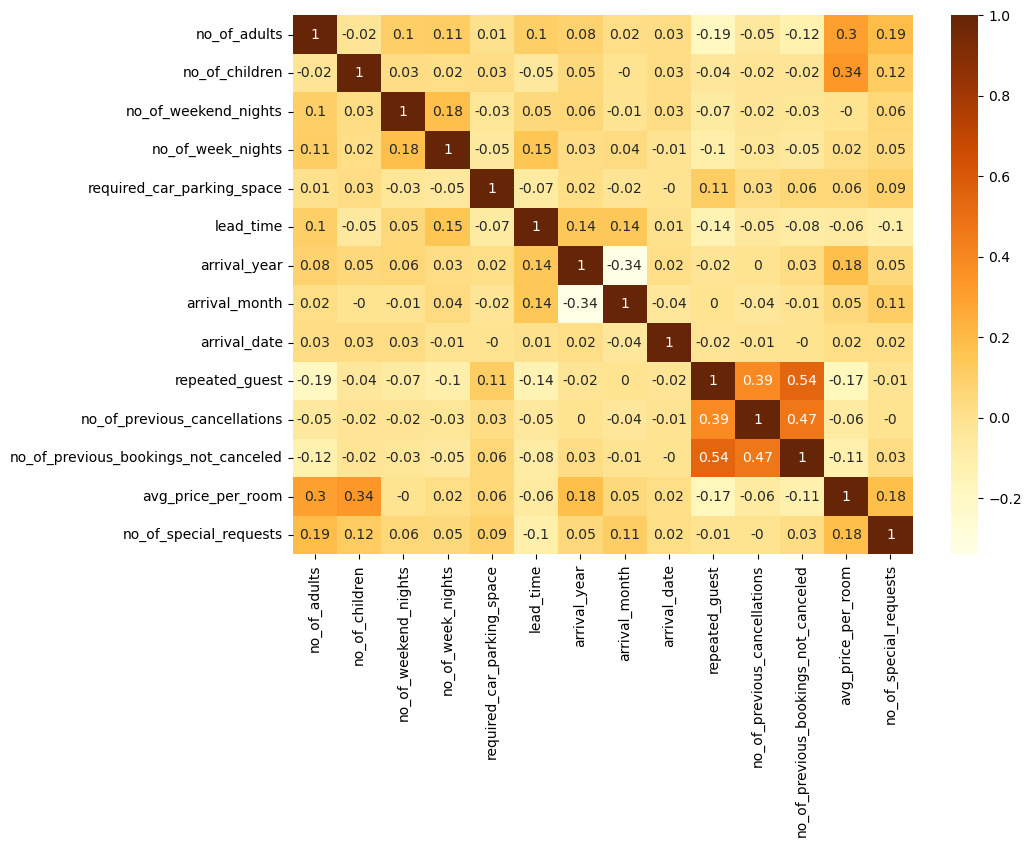

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr().round(2), annot = True, cmap = 'YlOrBr')

The above correlation matrix shows that there is a weak positive relationship and a weak negative relationship between variables.

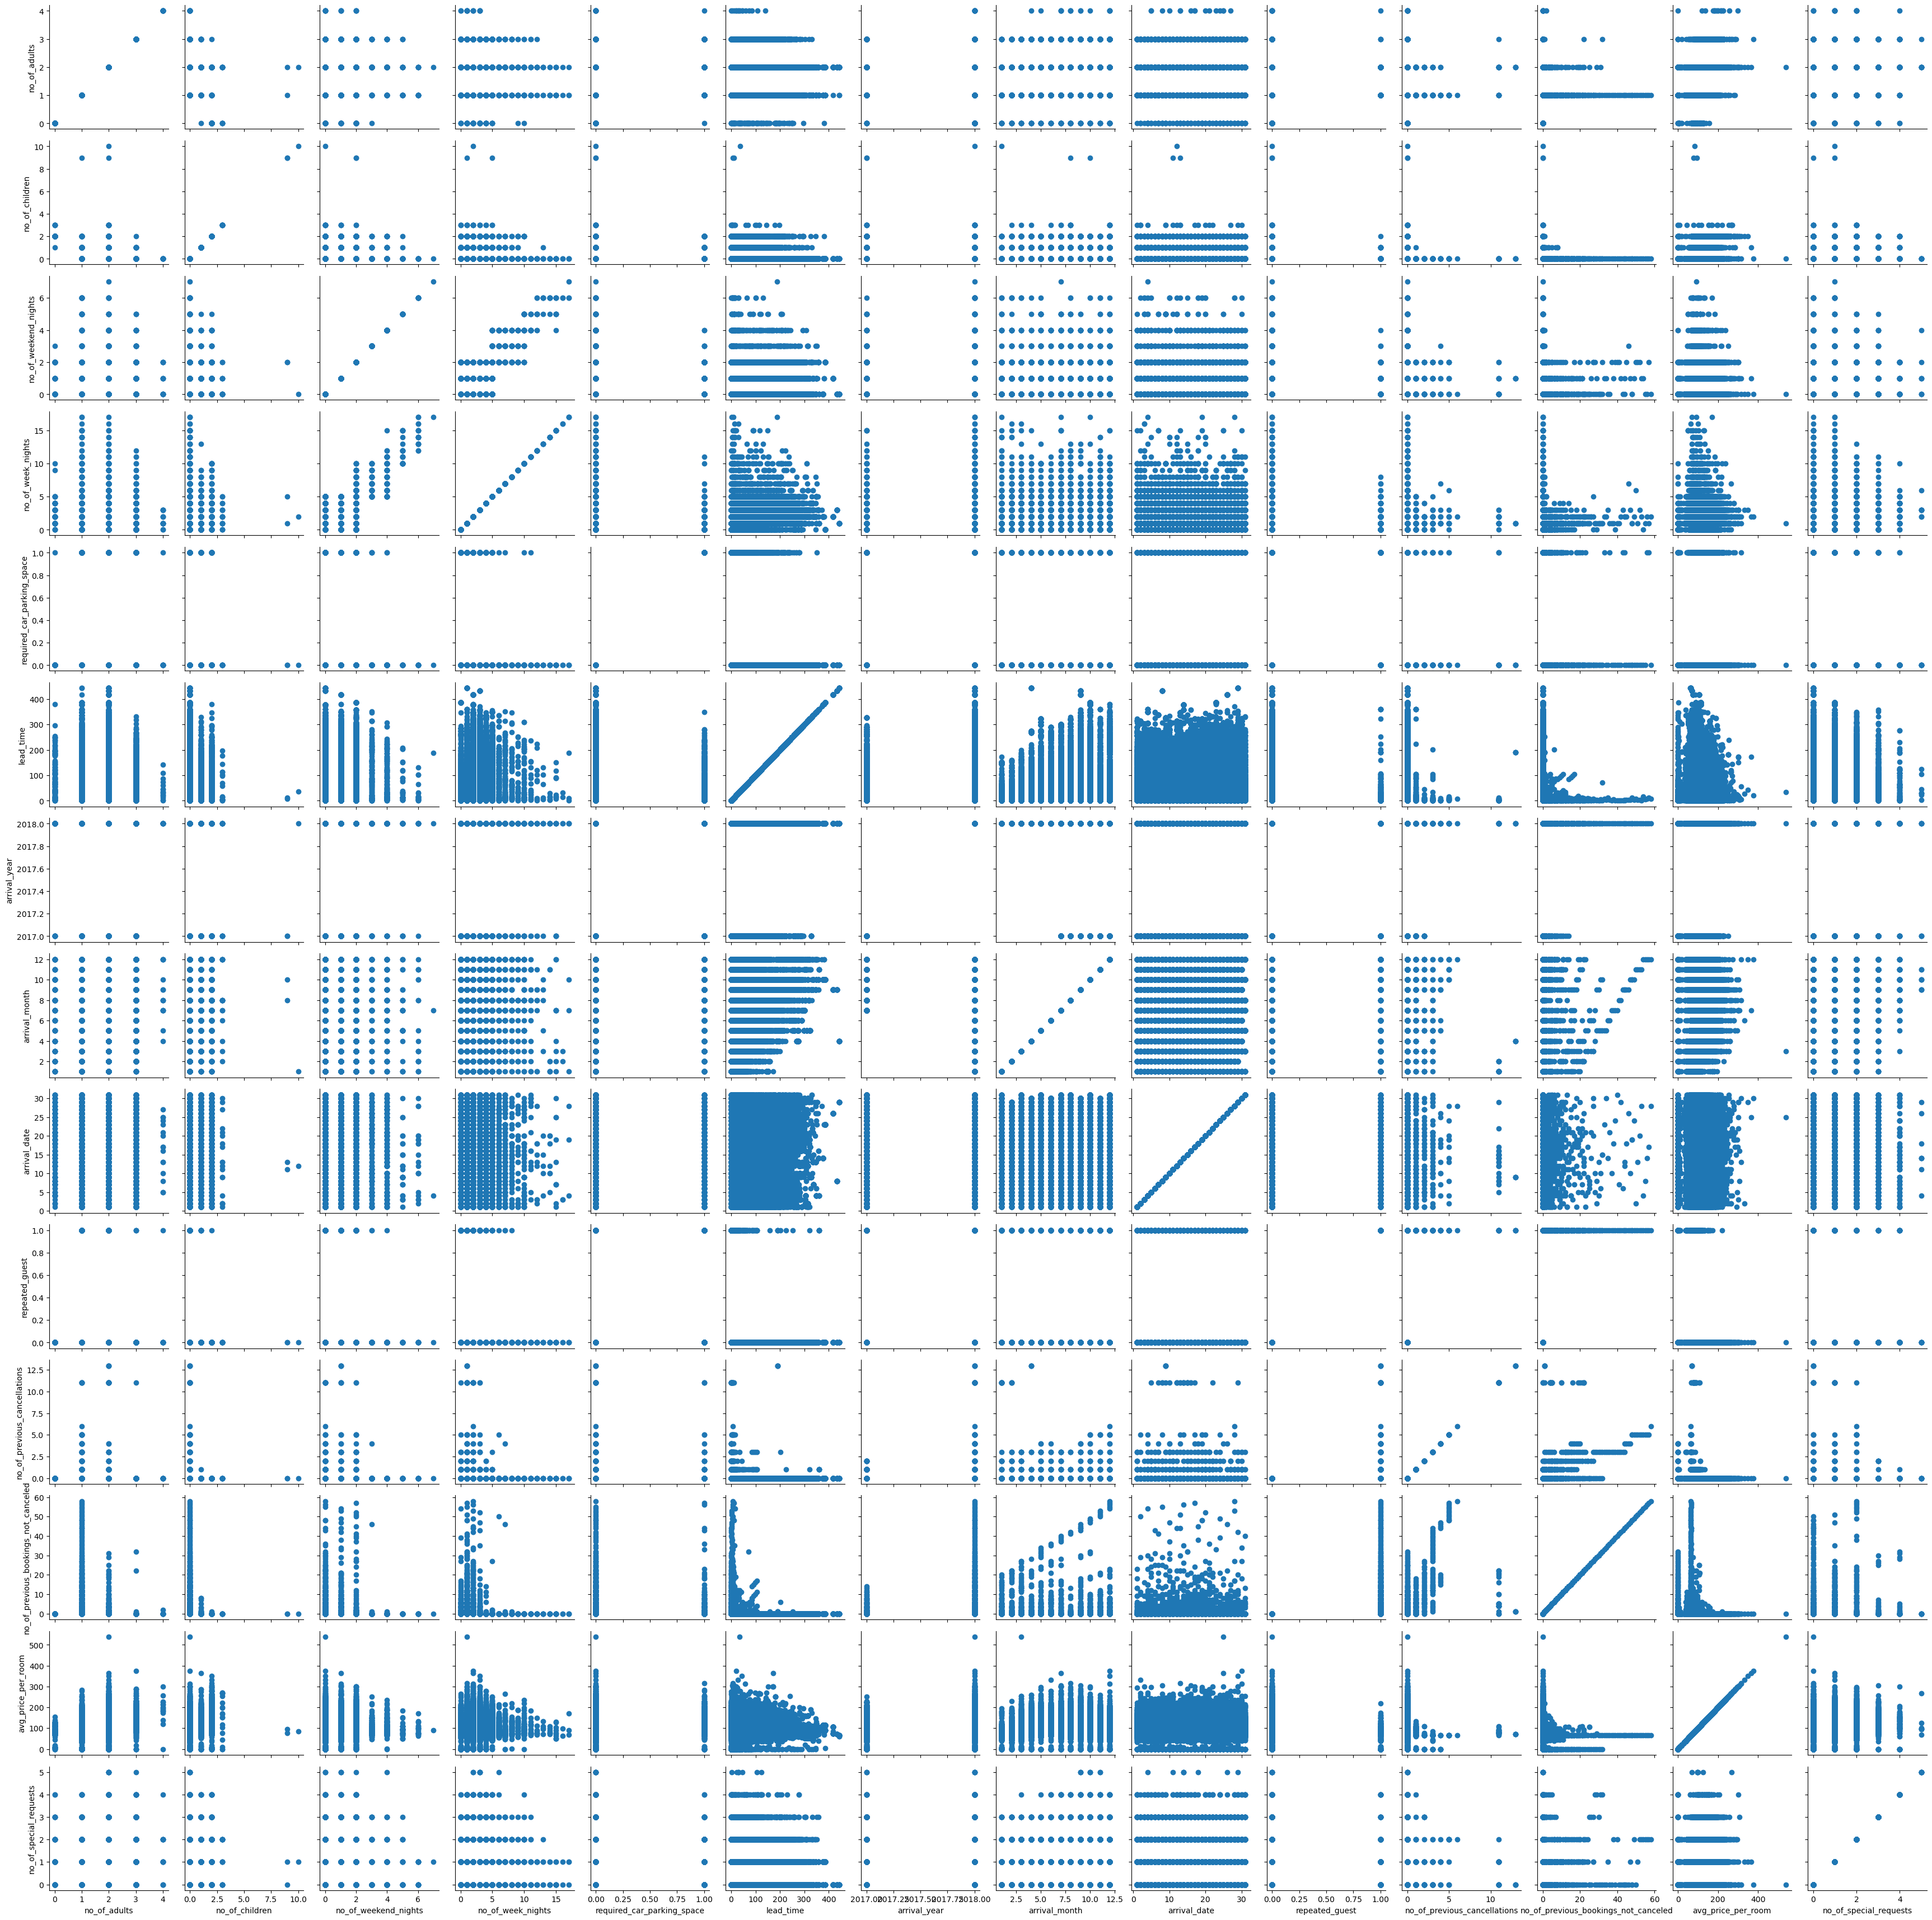

In [33]:
grids = sns.PairGrid(df)
grids.map(plt.scatter)

Here, sns.PairGrid() create a pairwise grid of variables in a dataset and the map function map the relationship among variables to the grids.

# 7. Statistics-Based Data Analysis

In [34]:
#plt.figure(figsize = (20, 25))
#plt.hist(df)
#plt.title('Histogram of Hotel Reservation')
#plt.show();

# 7.1. Model Building

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Logistic Regression (LR)
The type of regression analysis in statistics used for the prediction of the outcome of a categorical dependent variable from a set of predictor or independent variables is LR. In LR, the dependent variable is always binary. It is mainly used for prediction and calculating the probability of success.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [45]:
vect.fit(df)

CountVectorizer()

In [46]:
df_hotel = vect.transform(df)
df_hotel.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [47]:
hotel_reserve = pd.DataFrame(df_hotel.toarray(), columns=vect.get_feature_names())

In [48]:
hotel_reserve.head()

arrival_date  arrival_month  arrival_year  avg_price_per_room  booking_id  \
0             0              0             0                   0           1   
1             0              0             0                   0           0   
2             0              0             0                   0           0   
3             0              0             0                   0           0   
4             0              0             0                   0           0   

   booking_status  lead_time  market_segment_type  no_of_adults  \
0               0          0                    0             0   
1               0          0                    0             1   
2               0          0                    0             0   
3               0          0                    0             0   
4               0          0                    0             0   

   no_of_children  no_of_previous_bookings_not_canceled  \
0               0                                     0   
1               0                                     0   
2               1                                     0   
3               0                                     0   
4               0                                     0   

   no_of_previous_cancellations  no_of_special_requests  no_of_week_nights  \
0                             0                       0                  0   
1                             0                       0                  0   
2                             0                       0                  0   
3                             0                       0                  0   
4                             0                       0                  1   

   no_of_weekend_nights  repeated_guest  required_car_parking_space  \
0                     0               0                           0   
1                     0               0                           0   
2                     0               0                           0   
3                     1               0                           0   
4                     0               0                           0   

   room_type_reserved  type_of_meal_plan  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   0                  0

In [66]:
#X_train, X_test, y_train, y_test = train_test_split(hotel_reserve.drop('booking_id',axis=1), 
 #                                                   hotel_reserve['booking_id'], test_size=0.30, 
  #                                                  random_state=102)

In [67]:
from sklearn.linear_model import LogisticRegression
predictors = ['arrival_date', 'arrival_month', 'arrival_year', 'avg_price_per_room', 'lead_time', 'market_segment_type', 
              'no_of_adults', 'no_of_children', 'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations',
             'no_of_special_requests', 'no_of_week_nights', 'no_of_weekend_nights', 'repeated_guest', 'required_car_parking_space',
             'room_type_reserved', 'type_of_meal_plan']
result = 'booking_status'
X = hotel_reserve[predictors]
y = hotel_reserve[result]

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)
print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  6.319145426867904e-16
classes [0 1]


coeff
arrival_date                         -13.269305
arrival_month                        -13.269305
arrival_year                         -13.269305
avg_price_per_room                   -13.269305
lead_time                            -13.269305
market_segment_type                  -13.269305
no_of_adults                         -13.269305
no_of_children                       -13.269305
no_of_previous_bookings_not_canceled -13.269305
no_of_previous_cancellations         -13.269305
no_of_special_requests               -13.269305
no_of_week_nights                    -13.269305
no_of_weekend_nights                 -13.269305
repeated_guest                       -13.269305
required_car_parking_space           -13.269305
room_type_reserved                   -13.269305
type_of_meal_plan                    -13.269305

# Model Summary

In [68]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.072963
         Iterations: 35
                                         Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.646  
Dependent Variable:              booking_status              AIC:                         36.7726
Date:                            2023-04-20 17:13            BIC:                         52.8281
No. Observations:                19                          Log-Likelihood:              -1.3863
Df Model:                        16                          LL-Null:                     -3.9176
Df Residuals:                    2                           LLR p-value:                 0.99543
Converged:                       0.0000                      Scale:                       1.0000 
No. Iterations:                  35.0000                                                         
----------------------------------------------------------------------------------------------

The dependent variable is booking status, and others are predictors. We can see that the number of adults coefficient is -23.5175. Since the number of adults for 2 is 1 and 0 for 1, Being 2 adults reduces the booking status to about 16% (exp(-23.5175) = 16350102444.685) of the case where the number of adults is 1. Also, arrival date, arrival month, arrival year, average price per room, lead time, market segment type, number of children, number of previous bookings not cancelled, number of previous cancellations, number of special requests, number of weeknights, number of weekend nights, repeated guests, required car parking space, room type reserved, and type of meal plan reduced the booking status by 16%.

# Model Evaluation

In [69]:
logmodel = LogisticRegression()

logmodel.fit(X,y)

predictions = logmodel.predict(X)
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



In [74]:
#from sklearn import metrics
#Accuracy = metrics.accuracy_score(y, predictions)
#print(Accuracy)

# 8. Discussion of Findings

This is a hotel reservation dataset. The data contains 36,275 rows and 19 columns. The above heatmap results show that there is no missing information, so there is no need to fill in any data. The analysis of the booking status shows that the highest number of adult cancelled and not cancelled bookings is two, followed by one.

The report also shows that the highest number of children with cancelled or not cancelled bookings is 0, which means children are likely not to have cancelled or not cancelled bookings. The analysis of the booking status shows that the highest number of weekend nights that a booking is cancelled or not cancelled is 0, followed by one and two, respectively. This indicates that the majority of time bookings are likely not to be cancelled or cancelled by the clients.

According to the analysis of booking status, the online segment has the highest number of market segment-type cancellations and non-cancellations by clients, followed by the offline segment, corporate segment, and complementary segment. This means online platforms make it easy for customers to cancel or not cancel bookings. In addition, the highest type of meal plan cancelled or not cancelled by the client is Meal Plan 1, followed by Not Select and Meal Plan 2, respectively.

The highest required parking space cancelled or not cancelled by the client is 0, while spaces numbered 1 are not likely to be cancelled. which means bookings are not likely to be cancelled. According to the plot above, the room types with the highest number of cancelled and not-cancelled bookings are of type 1. The highest number of adults booking weekend nights is 2. This means two adults always book at night by the weekend. The highest number of adults booking weekend nights is 1. This means I always book at night during the week. The largest number of adults reserved rooms. This shows that four adults at a time always reserved rooms 5 and 7, respectively. This shows that adults always reserve rooms 5 and 7 most of the time.

The largest number of children who reserved rooms shows that 10 children at a time always reserved type 4, and 9 children each reserved types 2 and 1, respectively. This shows that children always reserve room types 2, 1, and 7 most of the time. The above correlation matrix shows that there is a weak positive relationship and a weak negative relationship between variables. The dependent variable is booking status, and others are predictors. We can see that the number of adults coefficient is -23.5175. Since the number of adults for 2 is 1 and 0 for 1, having 2 adults reduces the booking status to about 16% (exp(-23.5175) = 16350102444.685) of the case where the number of adults is 1. Also, arrival date, arrival month, arrival year, average price per room, lead time, market segment type, number of children, number of previous bookings not cancelled, number of previous cancellations, number of special requests, number of weeknights, number of weekend nights, repeated guests, required car parking space, room type reserved, and type of meal plan reduced the booking status by 16%.

The organisation should increase its focus on children because they are unlikely to cancel bookings. The majority of weekend nights bookings might be cancelled. The hotel management should introduce more packages that will encourage clients. According to the analysis of booking status, the online segment has the highest number of market segment-type cancellations and non-cancellations by clients, followed by the offline segment (physical), corporate segment, and complementary segment. This means online platforms make it easy for customers to cancel or not cancel bookings. In addition, since the highest type of meal plan cancelled or not cancelled by the client is Meal Plan 1, the organisation should modify and repackage all the meal types.
 
The highest required parking space cancelled or not cancelled by the client is 0, while spaces numbered 1 are not likely to be cancelled. which means bookings are not likely to be cancelled. Also, the room types with the highest number of cancelled and not-cancelled bookings are of type 1. The highest number of adults booking weekend nights is 2. This means two adults always book at night by the weekend. The highest number of adults booking weekend nights is 1. This means at least 1 adult always books at night during the week. In addition, four adults at a time always reserve rooms 5 and 7, respectively. This shows that adults always reserve rooms 5 and 7 most of the time, while children always reserve types 2, 1, and 7 most of the time.
 
The dependent variable is booking status, and others are predictors. We can see that the number of adults coefficient is -23.5175. Since the number of adults for 2 is 1 and 0 for 1, having 2 adults reduces the booking status to about 16% (exp(-23.5175) = 16350102444.685) of the case where the number of adults is 1. Also, arrival date, arrival month, arrival year, average price per room, lead time, market segment type, number of children, number of previous bookings not cancelled, number of previous cancellations, number of special requests, number of weeknights, number of weekend nights, repeated guests, required car parking space, room type reserved, and type of meal plan reduced the booking status by 16% (cancelled or not cancelled).

# 9. Conclusion
The data contains 36,275 rows and 19 columns. The report shows that the highest number of children with cancelled or not cancelled bookings is 0, which means children are likely not to have cancelled or not cancelled bookings. The analysis of the booking status shows that the highest number of weekend nights that a booking is cancelled or not cancelled is 0, followed by one and two, respectively. This indicates that the majority of time bookings are likely not to be cancelled or cancelled by the clients. The online platforms make it easy for customers to cancel or not cancel bookings. for the required parking space, cancelled or not cancelled bookings are not likely to be cancelled. Two or more adults at a time always book at night by the weekend. At least 1 or 2 adults always book at night during the week. The largest number of adults who reserved rooms shows that four adults at a time always reserved rooms 5 and 7; thus, adults always reserve rooms 5 and 7 most of the time. The largest number of children who reserved rooms shows that children always reserve room types 2, 1, and 7 most of the time. There is a weak positive relationship and a weak negative relationship between variables. It was discovered that booking status (a dependent variable) and other predictors (independent variables) show that the number of adults coefficient is -23.5175. Thus, since the number of adults for 2 is 1 and 0 for 1, having 2 adults reduces the booking status to about 16% (exp(-23.5175) = 16350102444.685) of the case where the number of adults is 1. Also, arrival date, arrival month, arrival year, average price per room, lead time, market segment type, number of children, number of previous bookings not cancelled, number of previous cancellations, number of special requests, number of weeknights, number of weekend nights, repeated guests, required car parking space, room type reserved, and type of meal plan reduced the booking status by 16%.